/opt/anaconda3/envs/research/lib/python3.11/site-packages/gstools/covmodel/plot.py:121: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


old model: Gau(dim=2, var=2.0, len_scale=10.0, nugget=0.0)
new model: Gau(dim=3, var=1.0, len_scale=15.0, nugget=0.1)


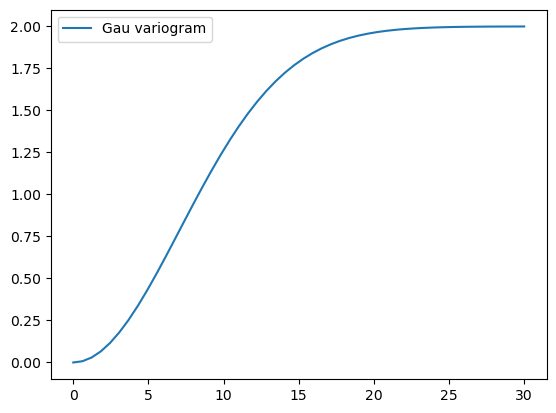

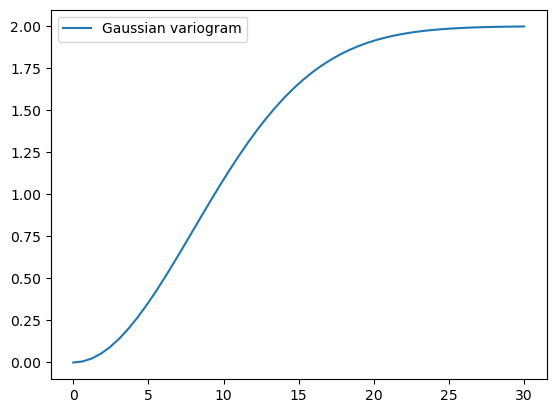

In [1]:
"""
Introductory example
====================

Let us start with a short example of a self defined model (Of course, we
provide a lot of predefined models [See: :any:`gstools.covmodel`],
but they all work the same way).
Therefore we reimplement the Gaussian covariance model
by defining just the "normalized"
`correlation <https://en.wikipedia.org/wiki/Autocovariance#Normalization>`_
function:
"""

import numpy as np

import gstools as gs


# use CovModel as the base-class
class Gau(gs.CovModel):
    def cor(self, h):
        return np.exp(-(h**2))


###############################################################################
# Here the parameter ``h`` stands for the normalized range ``r / len_scale``.
# Now we can instantiate this model:

model = Gau(dim=2, var=2.0, len_scale=10)

###############################################################################
# To have a look at the variogram, let's plot it:

model.plot()

###############################################################################
# This is almost identical to the already provided :any:`Gaussian` model.
# There, a scaling factor is implemented so the len_scale coincides with the
# integral scale:

gau_model = gs.Gaussian(dim=2, var=2.0, len_scale=10)
gau_model.plot()


###############################################################################
# Parameters
# ----------
#
# We already used some parameters, which every covariance models has.
# The basic ones are:
#
#     - **dim** : dimension of the model
#     - **var** : variance of the model (on top of the subscale variance)
#     - **len_scale** : length scale of the model
#     - **nugget** : nugget (subscale variance) of the model
#
# These are the common parameters used to characterize
# a covariance model and are therefore used by every model in GSTools.
# You can also access and reset them:

print("old model:", model)
model.dim = 3
model.var = 1
model.len_scale = 15
model.nugget = 0.1
print("new model:", model)


###############################################################################
# .. note::
#
#    - The sill of the variogram is calculated by ``sill = variance + nugget``
#      So we treat the variance as everything **above** the nugget,
#      which is sometimes called **partial sill**.
#    - A covariance model can also have additional parameters.


/opt/anaconda3/envs/research/lib/python3.11/site-packages/gstools/covmodel/plot.py:136: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/opt/anaconda3/envs/research/lib/python3.11/site-packages/gstools/covmodel/plot.py:151: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


<Axes: >

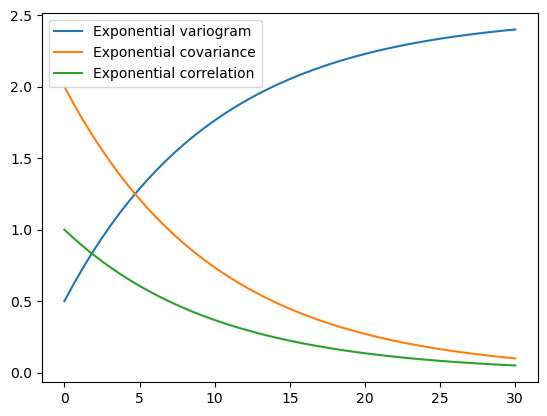

In [2]:
r"""
Basic Methods
=============

The covariance model class :any:`CovModel` of GSTools provides a set of handy
methods.

One of the following functions defines the main characterization of the
variogram:

- ``CovModel.variogram`` : The variogram of the model given by

  .. math::
      \gamma\left(r\right)=
      \sigma^2\cdot\left(1-\rho\left(r\right)\right)+n

- ``CovModel.covariance`` : The (auto-)covariance of the model given by

  .. math::
      C\left(r\right)= \sigma^2\cdot\rho\left(r\right)

- ``CovModel.correlation`` : The (auto-)correlation
  (or normalized covariance) of the model given by

  .. math::
      \rho\left(r\right)

- ``CovModel.cor`` : The normalized correlation taking a
  normalized range given by:

  .. math::
      \mathrm{cor}\left(\frac{r}{\ell}\right) = \rho\left(r\right)


As you can see, it is the easiest way to define a covariance model by giving a
correlation function as demonstrated in the introductory example.
If one of the above functions is given, the others will be determined:
"""
import gstools as gs

model = gs.Exponential(dim=3, var=2.0, len_scale=10, nugget=0.5)
ax = model.plot("variogram")
model.plot("covariance", ax=ax)
model.plot("correlation", ax=ax)


[1.  0.5]
[10. 10.  5.]


/opt/anaconda3/envs/research/lib/python3.11/site-packages/gstools/field/plot.py:310: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


Anisotropy representations:
Anis. ratios: [0.5 0.4]
Main length scale 10.0
All length scales [10.  5.  4.]
Rotation angles [2.5 0.  0. ]


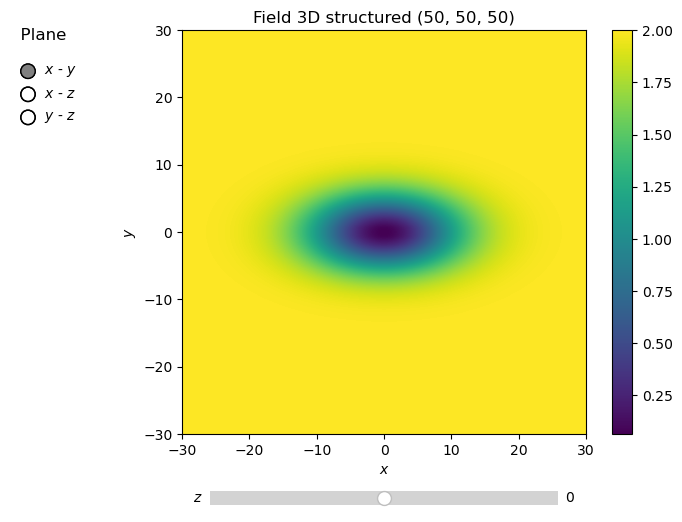

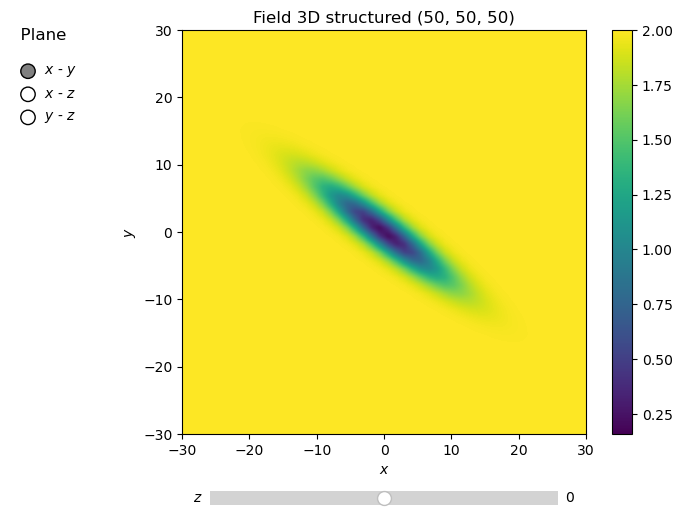

In [3]:
"""
Anisotropy and Rotation
=======================

The internally used (semi-) variogram
represents the isotropic case for the model.
Nevertheless, you can provide anisotropy ratios by:
"""
import gstools as gs

model = gs.Gaussian(dim=3, var=2.0, len_scale=10, anis=0.5)
print(model.anis)
print(model.len_scale_vec)


###############################################################################
# As you can see, we defined just one anisotropy-ratio
# and the second transversal direction was filled up with ``1.``.
# You can get the length-scales in each direction by
# the attribute :any:`CovModel.len_scale_vec`. For full control you can set
# a list of anistropy ratios: ``anis=[0.5, 0.4]``.
#
# Alternatively you can provide a list of length-scales:

model = gs.Gaussian(dim=3, var=2.0, len_scale=[10, 5, 4])
model.plot("vario_spatial")
print("Anisotropy representations:")
print("Anis. ratios:", model.anis)
print("Main length scale", model.len_scale)
print("All length scales", model.len_scale_vec)


###############################################################################
# Rotation Angles
# ---------------
#
# The main directions of the field don't have to coincide with the spatial
# directions :math:`x`, :math:`y` and :math:`z`. Therefore you can provide
# rotation angles for the model:

model = gs.Gaussian(dim=3, var=2.0, len_scale=[10, 2], angles=2.5)
model.plot("vario_spatial")
print("Rotation angles", model.angles)

###############################################################################
# Again, the angles were filled up with ``0.`` to match the dimension and you
# could also provide a list of angles. The number of angles depends on the
# given dimension:
#
# - in 1D: no rotation performable
# - in 2D: given as rotation around z-axis
# - in 3D: given by yaw, pitch, and roll (known as
#   `Tait–Bryan <https://en.wikipedia.org/wiki/Euler_angles#Tait-Bryan_angles>`_
#   angles)
# - in nD: See the random field example about higher dimensions



/opt/anaconda3/envs/research/lib/python3.11/site-packages/gstools/covmodel/plot.py:256: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/opt/anaconda3/envs/research/lib/python3.11/site-packages/gstools/covmodel/plot.py:271: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


<Axes: >

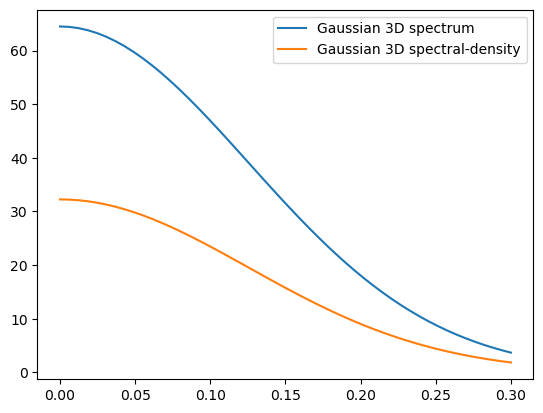

In [4]:
r"""
Spectral methods
================

The spectrum of a covariance model is given by:

.. math:: S(\mathbf{k}) = \left(\frac{1}{2\pi}\right)^n
    \int C(\Vert\mathbf{r}\Vert) e^{i b\mathbf{k}\cdot\mathbf{r}} d^n\mathbf{r}

Since the covariance function :math:`C(r)` is radially symmetric, we can
calculate this by the
`hankel-transformation <https://en.wikipedia.org/wiki/Hankel_transform>`_:

.. math:: S(k) = \left(\frac{1}{2\pi}\right)^n \cdot
    \frac{(2\pi)^{n/2}}{(bk)^{n/2-1}}
    \int_0^\infty r^{n/2-1} C(r) J_{n/2-1}(bkr) r dr

Where :math:`k=\left\Vert\mathbf{k}\right\Vert`.

Depending on the spectrum, the spectral-density is defined by:

.. math:: \tilde{S}(k) = \frac{S(k)}{\sigma^2}

You can access these methods by:
"""
import gstools as gs

model = gs.Gaussian(dim=3, var=2.0, len_scale=10)
ax = model.plot("spectrum")
model.plot("spectral_density", ax=ax)

###############################################################################
# .. note::
#    The spectral-density is given by the radius of the input phase. But it is
#    **not** a probability density function for the radius of the phase.
#    To obtain the pdf for the phase-radius, you can use the methods
#    :any:`CovModel.spectral_rad_pdf`
#    or :any:`CovModel.ln_spectral_rad_pdf` for the logarithm.
#
#    The user can also provide a cdf (cumulative distribution function) by
#    defining a method called ``spectral_rad_cdf``
#    and/or a ppf (percent-point function)
#    by ``spectral_rad_ppf``.
#
#    The attributes :any:`CovModel.has_cdf`
#    and :any:`CovModel.has_ppf` will check for that.


Main integral scale: 9.027452929509336
All integral scales: [9.02745293 9.02745293 9.02745293]
Anisotropy ratios: [0.4 0.2]
Main length scale: 11.077321674324725
All length scales: [11.07732167  4.43092867  2.21546433]
Main integral scale: 10.0
All integral scales: [10.  4.  2.]
90% Percentile scale: 17.437215135964117
Integral scale: 9.027452929509336
Length scale: 10.0


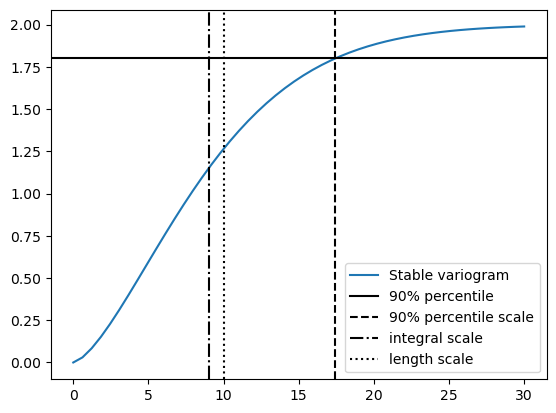

In [5]:
r"""
Different scales
================

Besides the length-scale, there are many other ways of characterizing a certain
scale of a covariance model. We provide two common scales with the covariance
model.

Integral scale
--------------

The `integral scale <https://en.wikipedia.org/wiki/Integral_length_scale>`_
of a covariance model is calculated by:

.. math:: I = \int_0^\infty \rho(r) dr

You can access it by:
"""
import gstools as gs

model = gs.Stable(dim=3, var=2.0, len_scale=10)
print("Main integral scale:", model.integral_scale)
print("All integral scales:", model.integral_scale_vec)


###############################################################################
# You can also specify integral length scales like the ordinary length scale,
# and len_scale/anis will be recalculated:

model = gs.Stable(dim=3, var=2.0, integral_scale=[10, 4, 2])
print("Anisotropy ratios:", model.anis)
print("Main length scale:", model.len_scale)
print("All length scales:", model.len_scale_vec)
print("Main integral scale:", model.integral_scale)
print("All integral scales:", model.integral_scale_vec)


###############################################################################
# Percentile scale
# ----------------
#
# Another scale characterizing the covariance model, is the percentile scale.
# It is the distance, where the normalized
# variogram reaches a certain percentage of its sill.

model = gs.Stable(dim=3, var=2.0, len_scale=10)
per_scale = model.percentile_scale(0.9)
int_scale = model.integral_scale
len_scale = model.len_scale
print("90% Percentile scale:", per_scale)
print("Integral scale:", int_scale)
print("Length scale:", len_scale)

###############################################################################
# .. note::
#
#    The nugget is neglected by the percentile scale.
#
#
# Comparison
# ----------

ax = model.plot()
ax.axhline(1.8, color="k", label=r"90% percentile")
ax.axvline(per_scale, color="k", linestyle="--", label=r"90% percentile scale")
ax.axvline(int_scale, color="k", linestyle="-.", label=r"integral scale")
ax.axvline(len_scale, color="k", linestyle=":", label=r"length scale")
ax.legend()


<Axes: >

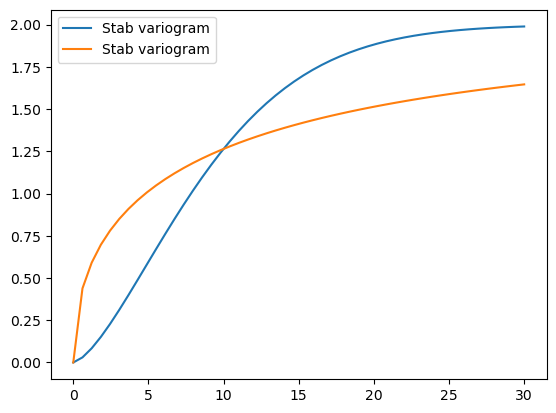

In [6]:
r"""
Additional Parameters
=====================

Let's pimp our self-defined model ``Gau`` from the introductory example
by setting the exponent as an additional parameter:

.. math::
   \rho(r) := \exp\left(-\left(\frac{r}{\ell}\right)^{\alpha}\right)

This leads to the so called **stable** covariance model and we can define it by
"""
import numpy as np

import gstools as gs


class Stab(gs.CovModel):
    def default_opt_arg(self):
        return {"alpha": 1.5}

    def cor(self, h):
        return np.exp(-(h**self.alpha))


###############################################################################
# As you can see, we override the method :any:`CovModel.default_opt_arg`
# to provide a standard value for the optional argument ``alpha``.
# We can access it in the correlation function by ``self.alpha``
#
# Now we can instantiate this model by either setting alpha implicitly with
# the default value or explicitly:

model1 = Stab(dim=2, var=2.0, len_scale=10)
model2 = Stab(dim=2, var=2.0, len_scale=10, alpha=0.5)
ax = model1.plot()
model2.plot(ax=ax)

###############################################################################
# Apparently, the parameter alpha controls the slope of the variogram
# and consequently the roughness of a generated random field.
#
# .. note::
#
#    You don't have to override the :any:`CovModel.default_opt_arg`,
#    but you will get a ValueError if you don't set it on creation.


Results: {'var': 1.02457398261999, 'len_scale': 5.081592171744162, 'nugget': 0.0, 'alpha': 0.9067040927315569}


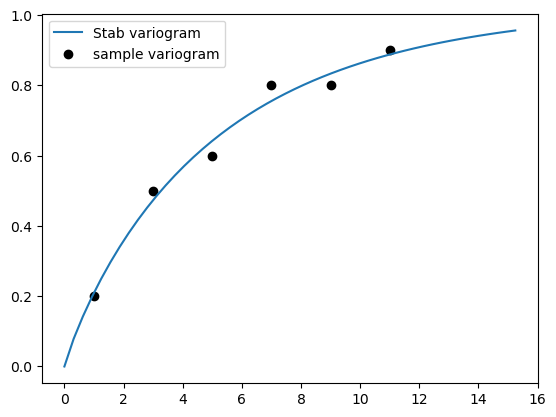

In [7]:
"""
Fitting variogram data
======================

The model class comes with a routine to fit the model-parameters to given
variogram data. In the following we will use the self defined stable model
from a previous example.
"""
import numpy as np

import gstools as gs


class Stab(gs.CovModel):
    def default_opt_arg(self):
        return {"alpha": 1.5}

    def cor(self, h):
        return np.exp(-(h**self.alpha))


# Exemplary variogram data (e.g. estimated from field observations)
bins = [1.0, 3.0, 5.0, 7.0, 9.0, 11.0]
est_vario = [0.2, 0.5, 0.6, 0.8, 0.8, 0.9]
# fitting model
model = Stab(dim=2)
# we have to provide boundaries for the parameters
model.set_arg_bounds(alpha=[0, 3])
results, pcov = model.fit_variogram(bins, est_vario, nugget=False)
print("Results:", results)

###############################################################################

ax = model.plot()
ax.scatter(bins, est_vario, color="k", label="sample variogram")
ax.legend()


###############################################################################
# As you can see, we have to provide boundaries for the parameters.
# As a default, the following bounds are set:
#
# - additional parameters: ``[-np.inf, np.inf]``
# - variance: ``[0.0, np.inf]``
# - len_scale: ``[0.0, np.inf]``
# - nugget: ``[0.0, np.inf]``
#
# Also, you can deselect parameters from fitting, so their predefined values
# will be kept. In our case, we fixed a ``nugget`` of ``0.0``, which was set
# by default. You can deselect any standard or
# optional argument of the covariance model.
# The second return value ``pcov`` is the estimated covariance of ``popt`` from
# the used scipy routine :any:`scipy.optimize.curve_fit`.
#
# You can use the following methods to manipulate the used bounds:
#
# .. currentmodule:: gstools.covmodel
#
# .. autosummary::
#    CovModel.default_opt_arg_bounds
#    CovModel.default_arg_bounds
#    CovModel.set_arg_bounds
#    CovModel.check_arg_bounds
#
# You can override the :any:`CovModel.default_opt_arg_bounds`
# to provide standard bounds for your additional parameters.
#
# To access the bounds you can use:
#
# .. autosummary::
#    CovModel.var_bounds
#    CovModel.len_scale_bounds
#    CovModel.nugget_bounds
#    CovModel.opt_arg_bounds
#    CovModel.arg_bounds
